In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.DataFrame([[95, 40, 280], [75, 35, 225], [80, 30, 260], [100, 45, 290], [95, 40, 310], [70, 35, 185], [50, 30, 175], [80, 45, 230], [90, 45, 235], [85, 35, 230]], columns=["y","x1","x2"])

# Realizamos la regresion multiple
def resultado_y():
    arr = np.array([])
    print(df.columns)
    for i in df.columns:
        if i == "y":
            arr = np.append(arr, np.sum(df[i].values))
        else:
            arr = np.append(arr, np.sum(df[i].values * df["y"].values))
    return arr

def matriz_x():
    matriz = []
    for i in df.columns:
        arr = []
        for j in df.columns:
            if i == "y" and j == "y":
                arr.append(len(df))
            elif i == "y":
                arr.append(np.sum(df[j]))
            elif j == "y":
                arr.append(np.sum(df[i]))
            else:
                arr.append(np.dot(df[i], df[j]))
        matriz.append(arr)
    return np.array(matriz)

y = resultado_y()
x = matriz_x()
b = np.linalg.inv(x).dot(y)
print(b)

Index(['y', 'x1', 'x2'], dtype='object')
[-11.0546111    0.91394614   0.24101098]


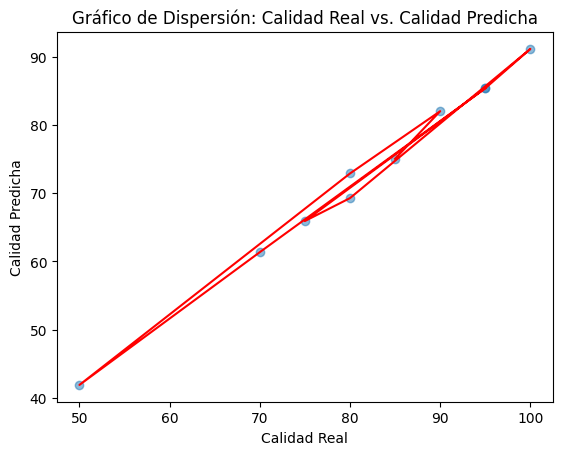

In [79]:
# Calculamos la recta de regresion multiple
y_multiple = b[0]
for i in range(1, len(b)):
    y_multiple += b[i] * df.iloc[:, i - 1]

# Crear un gráfico de dispersión de los puntos de datos reales
plt.scatter(df['y'], y_multiple, alpha=0.5)
plt.plot(df['y'], y_multiple,  color='red')
plt.xlabel('Calidad Real')
plt.ylabel('Calidad Predicha')
plt.title('Gráfico de Dispersión: Calidad Real vs. Calidad Predicha')
plt.show()